### Preparing data for clustering

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
file_path = Path(r'..\data\03_processed\01_ready_data.csv')
df = pd.read_csv(file_path)


In [12]:
#cols_for_grouping = df.loc[:, ~df.columns.isin(['Nazwa', 'ID', 'Adres e-mail'])].columns

# Stand.

### Nie trzeba standaryzować gdy mamy taką samą skale danych (chyba)

In [13]:
#df[cols_for_grouping] = StandardScaler().fit_transform(df[cols_for_grouping])
df.head()

,ID,Adres e-mail,Nazwa,W jaki sposób chcesz uczestniczyć w Community?,R,Python,Bash,GIT,Docker,CLI,...,UEWAdmin,FinTech,HealthTech,FashionTech,Ecommerce,SportTech,NonProfit,PropTech,Cybersecurity,HR
0,1,anonymous,NaN,1,2.0,3.0,3.0,4.0,3.0,4.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,2,anonymous,NaN,0,3.0,3.0,1.0,3.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,anonymous,NaN,0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,4,anonymous,NaN,1,3.0,3.0,2.0,2.0,2.0,2.0,...,3.0,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,5,anonymous,NaN,1,3.0,3.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


In [16]:
#Columns for model
data_for_model = df.loc[:, ~df.columns.isin(['Nazwa', 'ID', 'Adres e-mail', 'W jaki sposób chcesz uczestniczyć w Community?'])]

data_for_model.head(5)


,R,Python,Bash,GIT,Docker,CLI,FrontEnd,SQL,NoSQL,Azure,...,UEWAdmin,FinTech,HealthTech,FashionTech,Ecommerce,SportTech,NonProfit,PropTech,Cybersecurity,HR
0,2.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,3.0,3.0,1.0,3.0,2.0,2.0,1.0,4.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,...,2.0,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,3.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,...,3.0,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,3.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,1.0,...,3.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


# PCA

### Żeby zdecydować ile kolumn chcemy do modelu wziąć

In [29]:
#PCA
pca = PCA()
pca.fit(data_for_model)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

#Print best number of components
print('Best number of components: ', np.argmax(cumulative_variance > 0.95) + 1)

Best number of components:  20


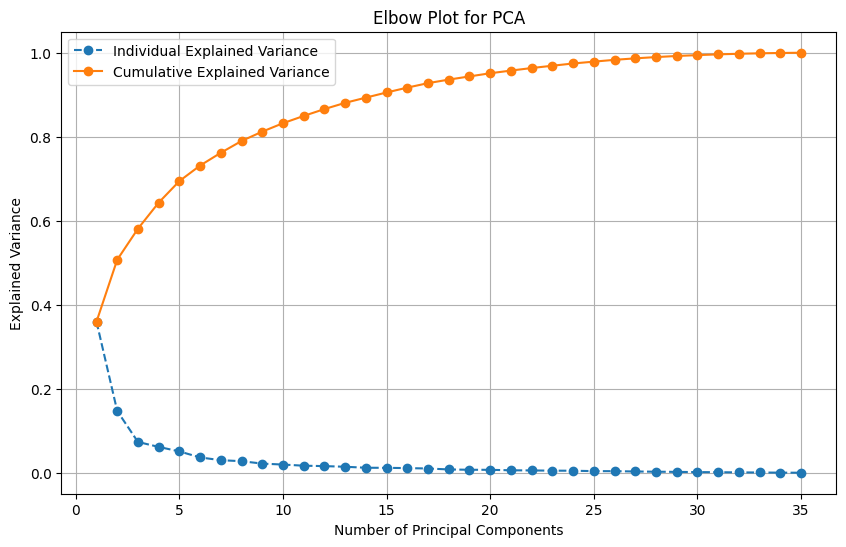

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#Create models 
pca = PCA(n_components=20)
pca.fit(data_for_model)
data_pca = pca.transform(data_for_model)



In [34]:
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i}' for i in range(1, 21)])

data_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,7.070195,-1.972369,-0.976639,2.415700,1.020703,-0.879257,-0.258016,1.830223,-1.453158,-1.004745,-0.693065,-0.626103,0.475718,0.542789,0.543422,-0.195690,-0.026172,-0.436660,0.423599,0.090686
1,2.847508,-0.464924,1.469564,-0.625283,0.459417,-0.993226,-0.225600,3.045994,-0.741957,-0.147214,-0.508278,0.831043,1.117205,-0.513277,-0.148863,-0.136999,-0.426408,0.854233,0.577668,-0.374701
2,-3.234755,-1.270639,3.677665,1.862521,-1.566010,-0.974552,0.268294,-0.117540,-1.436670,2.817887,-1.140072,0.451909,-0.650226,-0.324427,-0.076145,-0.716187,0.095271,0.071828,-0.758714,0.223066
3,3.868028,-0.822630,1.843475,-0.151981,0.718815,0.679854,-1.809953,0.994863,-0.013824,0.505015,-0.511465,0.741229,-0.694202,1.029450,0.851744,-0.240250,-0.069249,-0.161547,0.958792,0.943595
4,2.670396,0.210801,2.903511,-0.771284,-1.469835,2.763318,0.600050,-1.471757,-0.327170,-0.884688,0.914600,-1.094446,-0.598356,0.490191,-1.324908,0.148126,0.173269,0.489947,0.095941,0.721683
5,3.410429,-0.731163,1.010412,-0.005382,-1.467392,-0.647602,0.828778,-1.945746,0.071621,1.126685,-0.188759,0.219642,-0.557393,-0.555527,1.450428,0.515876,0.369170,-0.304272,-0.446541,-0.460104
6,-1.314742,0.232428,-1.266384,0.680713,0.254965,1.534017,0.458819,0.347756,-0.311405,0.499846,-1.360594,-1.458662,-0.252877,-0.483599,0.331364,0.048773,-1.223772,0.335434,1.210008,0.272593
7,-5.403578,-0.707005,1.304372,-0.260545,-0.018310,2.012365,-1.015549,0.633072,0.511559,0.472812,-0.542127,-0.326581,0.367427,0.806550,0.098210,0.013354,0.856907,0.465159,0.110436,-0.113565
8,3.179851,-0.667868,0.490907,-1.382764,1.098887,-1.569449,1.339407,-0.848413,0.510179,-0.169847,-0.084820,-1.103922,-0.172456,0.540893,-0.194815,-0.201612,-0.017310,0.661163,0.128586,-0.063543
9,-2.217150,-1.112309,-3.247275,-2.240338,-2.129932,0.627572,0.639845,-0.191656,-0.599421,0.458770,-0.315028,0.302216,-1.322351,-0.645203,-0.581072,1.336841,-0.029788,-0.419608,0.978370,-1.017184


In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(data_pca)

data_pca['Cluster'] = kmeans_labels

data_pca.head(10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Cluster
0,7.070195,-1.972369,-0.976639,2.415700,1.020703,-0.879257,-0.258016,1.830223,-1.453158,-1.004745,...,-0.626103,0.475718,0.542789,0.543422,-0.195690,-0.026172,-0.436660,0.423599,0.090686,2
1,2.847508,-0.464924,1.469564,-0.625283,0.459417,-0.993226,-0.225600,3.045994,-0.741957,-0.147214,...,0.831043,1.117205,-0.513277,-0.148863,-0.136999,-0.426408,0.854233,0.577668,-0.374701,2
2,-3.234755,-1.270639,3.677665,1.862521,-1.566010,-0.974552,0.268294,-0.117540,-1.436670,2.817887,...,0.451909,-0.650226,-0.324427,-0.076145,-0.716187,0.095271,0.071828,-0.758714,0.223066,0
3,3.868028,-0.822630,1.843475,-0.151981,0.718815,0.679854,-1.809953,0.994863,-0.013824,0.505015,...,0.741229,-0.694202,1.029450,0.851744,-0.240250,-0.069249,-0.161547,0.958792,0.943595,2
4,2.670396,0.210801,2.903511,-0.771284,-1.469835,2.763318,0.600050,-1.471757,-0.327170,-0.884688,...,-1.094446,-0.598356,0.490191,-1.324908,0.148126,0.173269,0.489947,0.095941,0.721683,2
5,3.410429,-0.731163,1.010412,-0.005382,-1.467392,-0.647602,0.828778,-1.945746,0.071621,1.126685,...,0.219642,-0.557393,-0.555527,1.450428,0.515876,0.369170,-0.304272,-0.446541,-0.460104,2
6,-1.314742,0.232428,-1.266384,0.680713,0.254965,1.534017,0.458819,0.347756,-0.311405,0.499846,...,-1.458662,-0.252877,-0.483599,0.331364,0.048773,-1.223772,0.335434,1.210008,0.272593,1
7,-5.403578,-0.707005,1.304372,-0.260545,-0.018310,2.012365,-1.015549,0.633072,0.511559,0.472812,...,-0.326581,0.367427,0.806550,0.098210,0.013354,0.856907,0.465159,0.110436,-0.113565,0
8,3.179851,-0.667868,0.490907,-1.382764,1.098887,-1.569449,1.339407,-0.848413,0.510179,-0.169847,...,-1.103922,-0.172456,0.540893,-0.194815,-0.201612,-0.017310,0.661163,0.128586,-0.063543,2
9,-2.217150,-1.112309,-3.247275,-2.240338,-2.129932,0.627572,0.639845,-0.191656,-0.599421,0.458770,...,0.302216,-1.322351,-0.645203,-0.581072,1.336841,-0.029788,-0.419608,0.978370,-1.017184,1
